#### Cécile Della Valle - Novembre 2018

In [1]:
### IMPORTATION
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import math
import sys


For computationnal purpose, we will define $N_T$ and $N_X$ respectively the number of tme steps and space steps. 

We have the relation :

$$ \begin{cases} 
\delta t = \frac{T}{N_T}\\
\delta x = \frac{L}{N_X}
\end{cases}$$



In [2]:
### NUMERICAL PARAMETERS
NT = 100  # Number of time steps
NX = 100  # Initial number of grid points
L = 100.0  # Domain size
T = 100.0  # Integration time
alpha = NX/L*NT/T

## EXPLICIT UP-DOWN STREAM SCHEME

Starting from the Lifschitz-Slyosov system :
$$
	\begin{cases}
		\partial _t u(x,t) + \partial _x (a(x)c(t) -b(x))u(x,t) =0 \\
		\displaystyle \frac{\mathrm{d} c }{\mathrm{dt}} = \int _0 ^\infty u(x,t) (b(x)-a(x)c(t))\mathrm{dx} \\
        u(L,t) = 0
	\end{cases}
$$

Under this assumption we can add the conservation of the total mass of the system condition :

$$ \rho (t) = \bar{M}\int_0^{\infty} x u(x,t) \mathrm{dx} + m c(t) $$

avec $\bar{M}$ la masse moyenne d'un polymère et $m$ la masse d'un monomère. We consider for computationnal reason that the size of a monomer is equal to $1$ and therefore that $\bar{M}/m = \delta x$.

We used the upstream-downstream explicit scheme to discretize the problem withe a regular time step of $\delta t = t_{i+1} - t_i$ and a regular space step of $\delta x = x_{i+1}-x_i$ :

$$ \begin{cases} 
\displaystyle \frac{u^{k+1}_i - u^k_i}{\delta t} + c^k \frac{a_iu^k_i - a_{i-1}u^k_{i-1}}{\delta x} - \frac{b_{i+1}u^k_{i+1} - b_iu^k_{i}}{\delta x} = 0 \quad \forall i \in [2,{N_X}-1]\\
\displaystyle \frac{u^{k+1}_{N_X} - u^k_{N_X}}{\delta t} - c^k \frac{a_{{N_X}-1}u^k_{{N_X}-1}}{\delta x} + \frac{b_{N_X}u^k_{{N_X}}}{\delta x} = 0 \\
\delta x c^{k+1} = \rho - \sum_{i=2}^{{N_X}} x_i u^k_i \delta x
\end{cases}$$

For $x={N_X}$ we write a condition different then $u=0$ but instead we stand that there is only two reactions occuring (instead of 4) : exchange with ${N_X}-1$-long polymers by deloplymerisation and polymerisation. Numerically this is equivalent to the asumption $a_{N_X} =0$ and $b_{{N_X}+1} =0$. We rewrite the above equation to solve the system directly :

$$ \begin{cases} 
\displaystyle u^{k+1}_i = (1-\alpha c^ka_i- \alpha b_i)u^k_i + \alpha c^ka_{i-1}u^k_{i-1}+ \alpha b_{i+1}u^k_{i+1} \quad \forall i \in [2,{N_X}-1]\\
\displaystyle u^{k+1}_{N_X} = (1-\alpha c^k a_{{N_X}}- \alpha b_{N_X})u^k_{N_X}+ \alpha c^k a_{{N_X}-1}u^k_{{N_X}-1} \\
\delta x c^{k+1} = \rho - \sum_{i=2}^{{N_X}} x_i u^k_i \delta x
\end{cases}$$



### Fourrier Von Neuman method to study the stability of the explicit up-down stream scheme

We take a step back and consider again our scheme :


$$ \begin{cases} 
\displaystyle u^{k+1}_i = (1-\alpha c^ka_i- \alpha b_i)u^k_i + \alpha c^ka_{i-1}u^k_{i-1}+ \alpha b_{i+1}u^k_{i+1} \quad \forall i \in [2,N_X-1]\\
\displaystyle u^{k+1}_{N_X} = (1-\alpha c^k a_{N_X}- \alpha b_{N_X})u^k_{N_X}+ \alpha c^k a_{N_X-1}u^k_{N_X-1} \\
\delta x c^{k+1} = \rho - \sum_{i=2}^{N_X} x_i u^k_i \delta x
\end{cases}$$

We will study the stability of this equation with the Fourrier-Von Neuman method. It consist on writting the solution according to this form $u(x_i,t_k) = \hat{u}^{k}(n) e^{jnx_i}$. To simplify the analysis we will supose that $a$ and $b$ are constant, which is the case in our simulation anyway.

And then we compute the amplification coefficient :

$ \hat{u}^{k+1}(n) = \mathscr{G}(\delta x, \delta t, n) \hat{u}^{k}(n)$

and 
$ \mathscr{G}(\delta x, \delta t, n) = 1 - \alpha_p - \alpha_d + \alpha_p e^{-jn \delta x} + \alpha_d e^{+jn \delta x}$

$ 
\begin{cases}
\alpha_p = \alpha c^ka \\
\alpha_d = \alpha b \\
\tilde{\alpha} = \alpha_p + \alpha_d 
\end{cases}
$

$ 
\begin{split} 
|\mathscr{G}(\delta x, \delta t, n)|^2 & = (1 - \tilde{\alpha} + \tilde{\alpha} cos(n \delta x)^2 + (\alpha_d - alpha_p)^2 sin(n\delta x)^2\\
                                         & = 1 - 4\tilde{\alpha}(1-\tilde{\alpha})sin(\frac{n\delta x}{2})^2 - 4\alpha_p\alpha_dsin(nx)^2\\
\end{split}
$

We find the classic case of a transport equation with $\tilde{\alpha} = c^ka+b $ The theory of stability says that :

$$ \text{Scheme stable} \quad \iff 
\quad \sup\limits_{n} \mathscr{G}(\delta x, \delta t, n) \leq 1+ 0(\delta t) $$

So the scheme should be stable as long as $ 0 \leq \tilde{\alpha} \leq 1 $ and then $ \forall n$ $|\mathscr{G}(\delta x, \delta t, n)| \leq 1$.

The solution could then become unstable if the system depolymerised very quickly and $c^k$ increase consequently. To assure that this case can not append, we can set the initial condition so that $ \frac{\rho}{\delta x}a +b \leq 1 $. But then we increase dramatically the diffusion of the scheme.


In [3]:
### CFL TEST
cmono0 = 10
a = 0.05
b = 0.4
CFL = T/NT*NX/L*(cmono0*a+b)
print(CFL)
if CFL>1.0:
    print("La CFL est :{} >1. \
    Le schéma est instable".format(round(CFL,2)))
    sys.exit()


0.9


### Numerical computation of the scheme

In order to complete the calculation of the previous system, we define a new matrix $\phi_k$ of the size $N_X \times N_X $ :

$$
\phi_k = \left( \begin{array}{cccc}
	1-\alpha(c^ka_2 + b_2)  &    b_3            &  0   & 0 &0\\
	 \alpha c^k a_2 & 1-\alpha (c^ka_3+ b_3) & \alpha b_4 & 0  &0 \\
	0  &   \ddots     & \ddots &  \ddots & 0 \\
    0 & 0 & \alpha c^ka_{N_X-2} & 1-\alpha(c^k a_{N_X-1}+ b_{N_X-1}) & \alpha b_{N_X} \\
	0  & 0   &0   & \alpha c^ka_{N_X-1} & 1-\alpha (c^ka_{N_X} + b_{N_X})
	 \end{array} \right)
$$

with $a{N_X}=0$ and $\alpha = \delta t / \delta x$.

And considering the above we have the relation :
$ u^{k+1} = \Phi_k u^k $

In [4]:
### FLOW COMPUTATION
def Flow(a,b,T,NT,L,NX,cmono):
    alpha = T/NT*NX/L
    # The last coefficient of the matrix a is equal to 0
    a[NX-1] = 0
    flow = np.eye(NX,NX) \
    - alpha*np.diag(a*cmono+b) \
    + alpha*np.diag(a[:-1]*cmono,-1)\
    + alpha*np.diag(b[1:],1)
    return flow

Let us now define the discretization of the integral involved in the conputation of $c$ ans $\rho$ :

$
\begin{split}
c^{k+1} & = \rho - \sum_{i=1}^{N_X} x_i u^k_i \delta x \\
        & = \rho - C u^k
\end{split}
$

Then we define a new matrix of the first moment, the observation $C$ of the size $N_X \times 1 $ :

$ C = [  \delta x, 2 \delta x , ..., i \delta x ,..., N_X \delta x ] $

We can also introduce the decond moment, which will help us to analyse our result.

$ C2 = [ 1^2 \delta x, 2^2 \delta x , ..., i^2 \delta x ,..., N_X^2 \delta x ] $


In [5]:
### MOMENT OPERATOR
# First order
moment1 = L/NX*np.linspace(L/NX, L, NX)
moment1[0] = 1/2*moment1[0]
moment1[NX-1] = 1/2*moment1[NX-1]

# Second order
moment2 = L/NX*np.square(np.linspace(L/NX, L, NX))
moment2[0] = 1/2*moment2[0]
moment2[NX-1] = 1/2*moment2[NX-1]

As for the initial condition we first define the distribution of size in our system as a gaussian distribution :

$ u^0_i = \frac{L}{10} e^{-\frac{(x_i-L/2)^2}{\sigma^2}} $

Then the concentration of monomers $c$ is initialized as a certain proportion of the moment of the polymers :

$ c_0 = \beta \sum_{i=2}^{N_X} x_i u^0_i \delta x $

In [6]:
### INITIAL CONDITION

# System state u
sigma = L/10
x = np.linspace(0.0,L,NX)
state0 = sigma*np.exp(-(x-L/2)**2/(sigma**2)) # Gaussienne

# Monomere concentration
propc = 0.01
cmono0 = propc*moment1.dot(state0) # Initial proportion of 1%
print("With the inital proportion of monomers equal to {0}, \
the initial concentration is equal to {1}."\
      .format(propc,cmono0))

# Computation of the constant total mass
masse_rho0 = L/NX*cmono0 + moment1.dot(state0)

With the inital proportion of monomers equal to 0.01, the initial concentration is equal to 88.61383027587341.


We now solve the system :

$ \begin{cases}
u^{k+1} = \phi^k u^k \\
c^{k+1} = \rho - Cu^{k+1}
\end{cases} $

In [7]:
### EVOLUTION COMPUTATION
def LSExplicitUD(a,b,T,L,NX,state0,cmono0):
    
    ### CFL
    NT = math.ceil(T*NX/L*np.amax(cmono0*a+b))
    print("The time step is = {}.".format(T/NT))
    if NT>1000 :
        print("The computational time is too large.")
        
    # State
    state = np.zeros((NX,NT))
    state[:,0] = state0.copy()
    state[0,0] = 0
    state[NX-1,0] = 0
    
    # Monomers
    cmono = np.zeros(NT)
    cmono[0] = cmono0
    
    # Total mass
    moment = L/NX*np.linspace(2*L/NX, L, NX)
    masse_rho = L/NX*cmono[0] + moment.dot(state[:,0])
    
    for k in range(0,NT-1):
        # State evolution
        state[:,k+1] = Flow(a,b,T,NT,L,NX,cmono[k]).dot(state[:,k])
        # We add the forgotten term acmono^2
        # state[0,k+1] = state[0,k+1]+alpha*a[0]*cmono[k]**2
        # Monomer evolution
        cmono[k+1] = NX/L*(masse_rho - moment.dot(state[:,k+1]))
        
    return state, cmono, NT

The code that follows stands only to plot the state (through time).

In [8]:
### PLOTTING SOLUTION OF 1D TRANSPORT EQUATION
def DisplaySolution(state,cmono,NT):
    
    # Set up the figure, the axis, and the plot element we want to animate
    fig_state = plt.figure()
    ax_state = plt.axes(xlim=(0, L), ylim=(0, 20))
    line_state, = ax_state.plot([], [], lw=2)

    # Initialization function: plot the background of each frame
    def Initstate():
        line_state.set_data([], [])
        return line_state,

    # Animation function.  This is called sequentially
    def Animate1DT(i):
        x = np.linspace(0, L, NX)
        y = state[:,i]
        line_state.set_data(x, y)
        return line_state,

    anim = animation.FuncAnimation(fig_state, Animate1DT, \
    init_func=Initstate,\
    frames=NT-1, interval=50, blit=True)

    return anim
    

The first simulation is running for the following parameters :

In [9]:
### PHYSICAL PARAMETERS
a = 0.02*np.ones(NX) # Polymerisation speed
b = 0.5*np.ones(NX)  # Depolymerisation speed
cmono0 = 100 # Proportion of monomers in the system


We will study further the condition of stability of the scheme, but we can already notice that with a propc = 0.01, the concentration is indeed equal to 10. So the coefficient of polymerisation a can't be too large.

In [10]:
# Computation of the solution
state, cmono, NT = LSExplicitUD(a,b,T,L,NX,state0,cmono0)
# Creation of animation
anim1 = DisplaySolution(state,cmono, NT)

plt.close(anim1._fig)
HTML(anim1.to_html5_video())

The time step is = 0.4.


### Study of the second order evolution

The time step is = 0.4.
The time step is = 0.4.


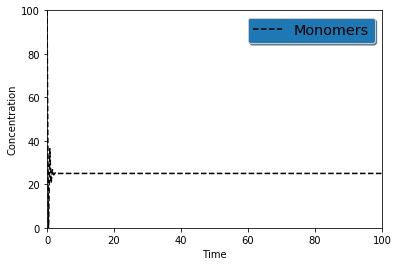

In [11]:
### PHYSICAL PARAMETERS
a = 0.02*np.ones(NX) # Polymerisation speed
b = 0.5*np.ones(NX)  # Depolymerisation speed
cmono0 = 100 # Proportion of monomers in the system
    
# Computation of the solution
state, cmono, NT = LSExplicitUD(a,b,T,L,NX,state0,cmono0)

### CFL
NT = math.ceil(T*NX/L*np.amax(cmono0*a+b))
print("The time step is = {}.".format(T/NT))
    
### PLOTING MONOMERS CONCENTRATION
def DisplayMonomers(cmono,T,NT):
    fig_monomers = plt.figure()
    ax_monomers = plt.axes(xlim=(0, T), ylim=(0,np.amax(cmono)))
    ax_monomers.set_xlabel("Time")
    ax_monomers.set_ylabel("Concentration")
    ax_monomers.plot(np.linspace(0.0,T,NT),cmono,'k--', label='Monomers')
    legend = ax_monomers.legend(loc='upper right', shadow=True, fontsize='x-large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')
    plt.show()
    
DisplayMonomers(cmono,T,NT)


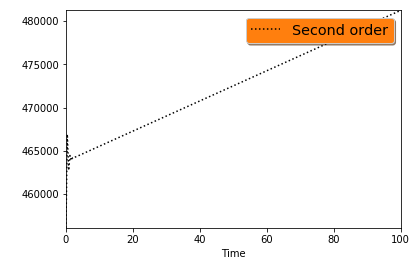

In [12]:
### PLOTTING SECOND ORDER
def Display2dMoment(state,T,NT,L,NX):
    
    # Computation of the 2nd moment
    moment2 = L/NX*np.square(np.linspace(L/NX, L, NX))
    moment2[0] = 1/2*moment2[0]
    moment2[NX-1] = 1/2*moment2[NX-1]
    mu2 = moment2.dot(state)
    
    fig_mu2 = plt.figure()
    ax_mu2 = plt.axes(xlim=(0, T), ylim=(np.amin(mu2),np.amax(mu2)))
    ax_mu2.set_xlabel("Time")
    ax_mu2.set_ylabel(" ")
    ax_mu2.plot(np.linspace(0.0,T,NT),mu2,'k:', label='Second order')
    legend = ax_mu2.legend(loc='upper right', shadow=True, fontsize='x-large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C1')
    plt.show()
    
Display2dMoment(state,T,NT,L,NX)

### Study of the parameters and initial condition influence

##### Depolymerisation
$ b >> ac_0 $

This system depolymerizes entirely according to theory. With the CFL of 1 we don't observe any diffusion.


$ \begin{cases}
a = 0.0\\
b = 1.0\\
c_0 = 0.0
\end{cases}$

In [13]:
# Computation of the solution
state, cmono, NT = LSExplicitUD(0.0*np.ones(NX),1*np.ones(NX),T,L,NX,state0,0.0)
# Creation of animation
animdep = DisplaySolution(state,cmono,NT)

plt.close(animdep._fig)
HTML(animdep.to_html5_video())


The time step is = 1.0.


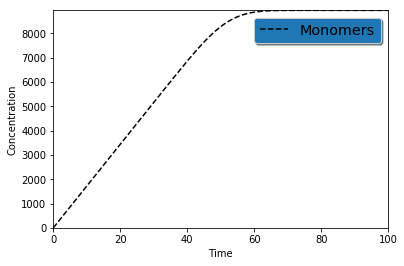

In [14]:
### PLOTTING MONOMERS CONCENTRATION OF DEPOLIMERISATION
DisplayMonomers(cmono,T,NT)

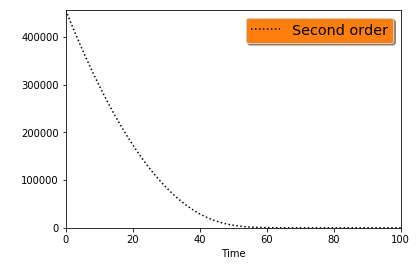

In [15]:
### PLOTTING SECOND ORDER OF DEPOLIMERISATION
Display2dMoment(state,T,NT,L,NX)

##### Polymerisation
$ b << ac_0 $

We notice that due to the instability limit we have a lot of diffusion. Then the solution stabalized because there are no more monomers to consume.


$ \begin{cases}
a = 0.1\\
b = 0.0\\
c_0 = 8
\end{cases}$

In [16]:
# Computation of the solution
state, cmono, NT = LSExplicitUD(0.1*np.ones(NX),0.0*np.ones(NX),T,L,NX,state0,100)
# Creation of animation
animpol = DisplaySolution(state,cmono, NT)

plt.close(animpol._fig)
HTML(animpol.to_html5_video())


The time step is = 0.1.


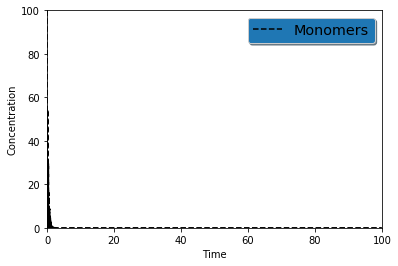

In [17]:
### PLOTTING MONOMERS CONCENTRATION OF DEPOLIMERISATION
DisplayMonomers(cmono,T,NT)

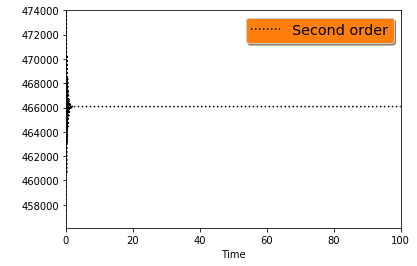

In [18]:
### PLOTTING SECOND ORDER OF DEPOLIMERISATION
Display2dMoment(state,T,NT,L,NX)

## IMPLICIT UP-DOWN STREAM SCHEME

### Numerical computation of the scheme

In [19]:
### NUMERICAL PARAMETERS
NT = 100  # Number of time steps
NX = 100  # Initial number of grid points
L = 100.0  # Domain size
T = 100.0  # Integration time

In order to avoid unstability of the scheme we study, we will solve the implicit scheme. Therefore we set the time step and space step previously to any computation. We will also be interested in the evolution of the solution's numerical diffusion towards the size of thespace step, namely the number $N_X$.


$$ \begin{cases} \displaystyle \frac{u^{k+1}_i - u^k_i}{\delta t} + c^{k+1} \frac{a_iu^{k+1}_i - a_{i-1}u^{k+1}_{i-1}}{\delta x} - \frac{b_{i+1}u^{k+1}_{i+1} - b_iu^{k+1}_{i}}{\delta x} = 0 \quad \forall i \in [2,N_X-1]\\
\displaystyle \frac{u^{k+1}_{N_X} - u^k_{N_X}}{\delta t} -  c^{k+1} \frac{a_{N_X-1}u^{k+1}_{i-N_X}}{\delta x} + \frac{b_{N_X}u^{k+1}_{N_X}}{\delta x} = 0 \\
u^{k+1}_1 = \rho - \sum_{i=2}^{N_X} x_i u^{k+1}_i \delta x
\end{cases}$$

Now we notice that this case is similar to the discretisation of the Becker-Döring system with a steady time step $\delta t$ and the notation $c^{k+1}=u_1^{k+1}$ :

$$ \begin{cases} 
u^{k+1}_i = u^k_i+ \delta t (u_1^{k+1} \bar{a}_{i-1}u^{k+1}_{i-1} - \bar{b}_iu^{k+1}_{i} - u_1^{k+1}\bar{a}_{i}u^{k+1}_{i} + \bar{b}_{i+1}u^{k+1}_{i+1})= c^k_i+ \delta t (J^{k+1}_{i-1} - J^{k+1}_i) \quad \forall i \in [2,N_X-1]\\
u^{k+1}_{N_X} = u^k_{N_X} +  \delta t (u_1^{k+1} \bar{a}_{N_X-1}u^{k+1}_{i-N_X} + \bar{b}_{N_X}u^{k+1}_{N_X} =  u^k_{N_X} +  \delta t J^{k+1}_{N_X-1}\\
u^{k+1}_1 = \bar{\rho} - \sum_{i=2}^{N_X} i u^k_i 
\end{cases}$$

with the conditions on the coefficient :

$ \begin{cases} 
\bar{a}_i = a_i / \delta x \\
\bar{b}_i= b_i / \delta x \\
i = x_i \delta x \\
\bar{\rho} = \rho
\end{cases}$

Therefore we can apply the same strategy as the one developped by Sara Harris in her PhD manuscript (chapter 8 page 71). This time the concentration of monomers will not be computed seperately, and the first coordinate of the vector $u$ (noted state in the code) will be that concentration.

In [20]:
### PHYSICAL PARAMETERS
a = 0.005*np.ones(NX) # Polymerisation speed
a[NX-1] = 0
b = 0.5*np.ones(NX)  # Depolymerisation speed
b[0] = 0
cmono0 = 100 # Proportion of monomers in the system


We define $F$ the matrix :


$$
F = \left( \begin{array}{c}
    \sum_{i=1}^{N_X} x_i u^{k+1}_i \delta x - \rho\\
	u^{k+1}_i - u^k_i + \alpha c^{k+1}(a_iu^{k+1}_i - a_{i-1}u^{k+1}_{i-1}) - \alpha (b_{i+1}u^{k+1}_{i+1} - b_iu^{k+1}_{i}) \\
	 u^{k+1}_{N_X} - u^k_{N_X} -  \alpha c^{k+1}a_{N_X-1}u^{k+1}_{i-N_X} + \alpha b_{N_X}u^{k+1}_{N_X}
	 \end{array} \right) =0
$$

This equation will be resolved using the Newton-Raphson method for the function F. First we will compute an analytic expretion of the Jacobian matrix of F. We denote $s$ the number of iterations. The Jacobian $dF$ is reversal. 

Then the Jacobian of F can be written in a more usefull form :

$
dF(u^{k+1}_s) = \left( \begin{array}{cc}
	\delta x & e \\
	 d_s & T_s 
	 \end{array} \right)
$


$\begin{cases}
T_s = Id + Au^{k+1}_{i=1,s} + B \\
 e_x = \delta x \times (2\delta x, 3 \delta x, ...,N_X \delta x = L) \\
 d_s = \alpha \times (a_2u^{k+1}_{2,s}-2a_1u^{k+1}_{1,s},.., a_iu^{k+1}_{i,s} - a_{i-1}u^{k+1}_{i-1,s},..,-a_{N_X-1}u^{k+1}_{i-N_X,s})^t
\end{cases}
$

 with
 
$
A = \alpha \left( \begin{array}{cccc}
	a_2  &    0           &  0   & 0 &0\\
	 - a_2 & a_3 & 0 & 0  &0 \\
	0  &   \ddots     & \ddots &  \ddots & 0 \\
    0 & 0 & - a_{N_X-2} & a_{N_X-1} & 0 \\
	0  & 0   &0   & - a_{N_X-1} & a_{N_X} 
	 \end{array} \right)
\quad \text{et} \quad
B = \alpha \left( \begin{array}{cccc}
	b_2  &    -b_3            &  0   & 0 &0\\
	 0 & b_3 & -b_4 & 0  &0 \\
	0  &   \ddots     & \ddots &  \ddots & 0 \\
    0 & 0 & 0 & b_{N_X-1} & -\alpha b_{N_X} \\
	0  & 0   &0   & 0 & b_{N_X}
	 \end{array} \right)
$

We then have to solve, according to the Newton-Raphson method, the following equation.

$$ 
\begin {cases}
dF(u^{k+1}_s) \delta^{k+1}_s = - F(u^{k+1}_s) \\
u^{k+1}_{s+1} = u^{k+1}_{s}+ \delta ^{k+1}_s
\end{cases}$$



In [21]:
### NEWTON RAPSON METHOD
def NewtonM(alpha,L,NX,rho,a,b,iter_max,uk):
    
    # Initialisation of increment 
    s = 0
    # Initialisation of delta (to enter the loop)
    delta = 100*np.ones(NX-1)
    # Initialisation
    ds = np.zeros(NX-1)
    # Set u^k+1 (s=0) = u^k
    uk1 = uk.copy()
    # Moment = sum of the total mass
    moment = L/NX*np.linspace(L/NX, L, NX)
    # Intermediate matrix initialisation
    A = alpha*(np.diag(a[1:]) - np.diag(a[1:-1],-1))
    B = alpha*(np.diag(b[1:]) - np.diag(b[1:-1],1))
    ex = L/NX*np.linspace(2*L/NX, L, NX-1)
    
    while (s<iter_max)&(np.amax(delta)>0.01):

        # Intermediate matrix dF = [1,ex];[ds,Ts]
        Ts = np.eye(NX-1,NX-1) + uk1[0]*A + B
        Tsinv = np.linalg.inv(Ts)
        ds[1:] = a[2:]*uk1[2:]-a[1:-1]*uk1[1:-1]
        ds[0] = a[1]*uk1[1] - 2*a[0]*uk1[0]
        ds = alpha*ds
        #Compute the function -F (uˆk+1_s)
        Fhat = -(uk1[1:] - uk[1:] + (uk1[0]*A+B).dot(uk1[1:]))
        #Include the first term due to nucleation
        Fhat[0] = Fhat[0] + alpha*a[0]*uk1[0]**2

        # Variation of the monomers
        delta1 = rho - moment.dot(uk1) - ex.dot(Tsinv).dot(Fhat)
        delta1 = delta1/( L/NX -ex.dot(Tsinv).dot(ds))
        # variations of the polymers
        delta = Tsinv.dot(Fhat) - delta1*Tsinv.dot(ds)

        # Computation of the solution
        uk1[0] = uk1[0] + delta1
        uk1[1:] = uk1[1:] + delta

        # Incrementing iteration step
        s=s+1
        if s==iter_max-1 :
                print("The algorithm didn't converge for time step {0} \
                with the error delta {1}"\
                      .format(k,np.amax(delta)))
                sys.exit()
                
        return uk1

In [22]:
def LSImplicitUD(T,NT,L,NX,a,b,cmono0,iter_max):

    x = np.linspace(L/NX,L,NX-1)
    # System state u
    sigma = L/10
    state = np.zeros((NX,NT))
    state[1:,0] = 10*np.exp(-(x-L/2)**2/(2*sigma**2)) # Gaussienne
    state[0,0] = cmono0 # Initial concentration of monomers

    # Computation of the constant total mass
    masse_rho = L/NX*np.linspace(L/NX, L, NX).dot(state[:,0])
    
    # Discretization coefficient
    alpha = T/NT*NX/L
    
    for k in range(0,NT-1):
        # Set c(s=0) = ck
        state[:,k+1] = state[:,k].copy() 
        state[:,k+1] = NewtonM(alpha,L,NX,\
                               masse_rho,\
                               a,b,\
                               iter_max,\
                               state[:,k])
        
    return state
        
        

In [23]:
### PLOTTING SOLUTION OF 1D TRANSPORT EQUATION
def DisplaySolutionImplicit(T,NT,L,NX,a,b,cmono0,iter_max):
    
    # Computation of the solution
    state = LSImplicitUD(T,NT,L,NX,a,b,cmono0,iter_max)
    
    # Set up the figure, the axis, and the plot element we want to animate
    fig_state = plt.figure()
    ax_state = plt.axes(xlim=(0, L), ylim=(-1, 12))
    line_state, = ax_state.plot([], [], lw=2)

    # Initialization function: plot the background of each frame
    def Initstate():
        line_state.set_data([], [])
        return line_state,

    # Animation function.  This is called sequentially
    def Animate1DT(i):
        x = np.linspace(L/NX, L, NX)
        y = state[:,i]
        line_state.set_data(x, y)
        return line_state,

    anim = animation.FuncAnimation(fig_state, Animate1DT, \
    init_func=Initstate,\
    frames=NT-1, interval=50, blit=True)

    return anim, state

And now we implement the solution.

In [24]:
iter_max = 100
anim2, state = DisplaySolutionImplicit(T,NT,L,NX,a,b,cmono0,iter_max)
plt.close(anim2._fig)
HTML(anim2.to_html5_video())

##### Depolymerisation
$ b >> ac_0 $

This system depolymerizes entirely according to theory. With the CFL of 1 we don't observe any diffusion.

$ \begin{cases}
a = 0.0\\
b = 1\\
c_0 = 0.0
\end{cases}$

In [25]:
iter_max = 100
anim2dep, state = DisplaySolutionImplicit(T,NT,L,NX,\
                                 0.0*np.ones(NX),\
                                 1.0*np.ones(NX),\
                                 0.0,iter_max)
plt.close(anim2dep._fig)
HTML(anim2dep.to_html5_video())

##### Polymerisation
$ b << ac_0 $

We notice that due to the instability limit we have a lot of diffusion. Then the solution stabalized because there are no more monomers to consume. 

$ \begin{cases}
a = 0.1\\
b = 0.0\\
c_0 = 8
\end{cases}$

In [26]:
iter_max = 100
anim2pol, state = DisplaySolutionImplicit(100,100,100,100,\
                                 1*np.ones(100),\
                                 0.00*np.ones(100),\
                                 100,iter_max)
plt.close(anim2pol._fig)
HTML(anim2pol.to_html5_video())

### Study of the diffusion of the implicit scheme

We have already noticed that this numerical scheme is equivalent to the Becker-Döring system with a space step equal to 1. We will now study cases where space step is superior to 1, and we will focus more specifically on the diffusion of the solution.

#### N = 100

In [27]:
iter_max = 100
L1 = 1000
NX1 = 100
T1 = 200
NT1 = 1000

a = 0.5*np.ones(NX1) # Polymerisation speed
a[NX1-1] = 0
b = 5*np.ones(NX1)  # Depolymerisation speed
b[0] = 0
cmono0 = 100 # Proportion of monomers in the system

anim3, state = DisplaySolutionImplicit(T1,NT1,L1,NX1,\
                                       a,b,cmono0,\
                                       iter_max)
plt.close(anim3._fig)
HTML(anim3.to_html5_video())

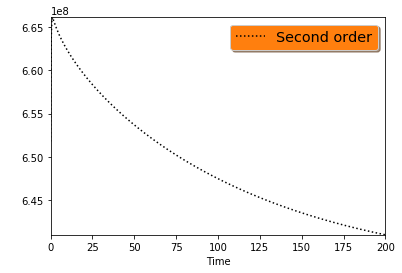

In [28]:
### PLOTTING SECOND ORDER OF DEPOLIMERISATION
Display2dMoment(state[1:,:],T1,NT1,L1,NX1-1)

#### N = 1000

In [29]:
iter_max = 100
L2 = 1000
NX2 = 1000

### PHYSICAL PARAMETERS
a = 0.5*np.ones(NX2) # Polymerisation speed
a[NX2-1] = 0
b = 5*np.ones(NX2)  # Depolymerisation speed
b[0] = 0
cmono0 = 100 # Proportion of monomers in the system

anim3, state = DisplaySolutionImplicit(T1,NT1,L2,NX2,a,b,cmono0,iter_max)
plt.close(anim3._fig)
HTML(anim3.to_html5_video())

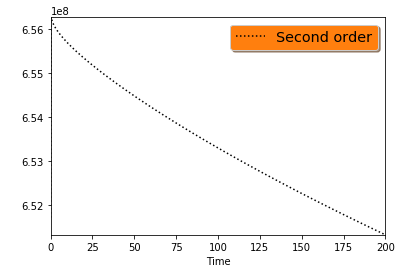

In [30]:
### PLOTTING SECOND ORDER OF DEPOLIMERISATION
Display2dMoment(state[1:,:],T1,NT1,L2,NX2-1)

## HARRIS COLLET SCHEME

Questions préliminaires sur la thèse de Sara Harris :
- Pourquoi souhaite-t-on que le schéma soit entropique? (p73 pour BD)
- La discrétisation décentrée correspond exactement à la discrétisation naturelle de BD? Pourquoi n'a-t-il donc pas exactement le comportement attendu?

The Lifschitz-Slyosov equation is completed with a second order term as follow :

$
\begin{cases}
\partial _t u(x,t) + \partial _x [a(x)c(t) -b(x) - \frac{\epsilon}{2} \partial_x (a(x)c(t) + b(x)) ]u(x,t) = 0 & x \in (0,\infty) & t \in (0,T) \\
 c(t) = \rho - \int_0^{\infty} x u(x,t) \mathrm{dx} & t \in (0,T) \\
 u(x,0) = u_0(x) & x \in (0,\infty) \\
 u(0,t) = r(t) & t \in (0,T)
\end{cases}
$

We now consider a implicit Eurler centered scheme to solve this equation. Keepeing the same notation as previoulsy, the disxcretization will lead to the following equations system :


$
u^{k+1}_i - u^k_i + \frac{\delta t}{2\delta x}(J^{k+1}_{i,1} - \frac{\epsilon}{\delta x}J^{k+1}_{i,2}) = 0 \quad i \in (1,N_X)
$

$
\begin{cases}
J^{k+1}_{i,1} = a_{i+1}c^{k+1}u^{k+1}_{i+1}-a_{i-1}c^{k+1}u^{k+1}_{i-1}-b_{i+1}u^{k+1}_{i+1} +b_{i-1}u^{k+1}_{i-1} \\
J^{k+1}_{i,2} = a_{i-1}c^{k+1}u^{k+1}_{i-1} + a_{i+1}c^{k+1}u^{k+1}_{i+1} - 2a_{i}c^{k+1}u^{k+1}_{i} + b_{i-1}u^{k+1}_{i-1} + b_{i+1}u^{k+1}_{i+1} - 2b_{i}u^{k+1}_{i}\\
J^{k+1}_{N_X,1} = -a_{N_X-1}c^{k+1}u^{k+1}_{N_X-1}+b_{N_X-1}u^{k+1}_{N_X-1}\\
J^{k+1}_{N_X,2} = a_{N_X-1}c^{k+1}u^{k+1}_{N_X-1} -2a_{N_X}c^{k+1}u^{k+1}_{N_X} +b_{N_X-1}u^{k+1}_{N_X-1} -2b_{N_X}u^{k+1}_{N_X}\\
	\end{cases}
$

We apply the same method using Newton-Raphson algorithm. Here the function $F$ is defined as below :

$$
F = \left( \begin{array}{c}
    \sum_{i=1}^{N_X} x_i u^{k+1}_i \delta x - \rho\\
    \vdots \\
	u^{k+1}_i - u^k_i + \mu (J^{k+1}_{i,1} - \frac{\epsilon}{\delta x}J^{k+1}_{i,2}) \\
	 \vdots
	 \end{array} \right) =0
$$

In order to compute the jacobian of F we compute the jacobian of ${J^{k+1}_1}$ and ${J^{k+1}_2}$ :

$
dJ^{k+1}_1 = \left( \begin{array}{cccc}
    0 & a_3c^{k+1}+b_3 &0 &0  \\
    -a_2c^{k+1}-b_2&0&a_4c^{k+1}+b_4&0\\
    0 & \ddots &\ddots &0\\
     0 &  -a_{NX-2}c^{k+1}-b_{N_X-2}&0&a_{N_X}c^{k+1}+b_{N_X}\\
    0&0&-a_{N_X-1}c^{k+1}-b_{N_X-1} &0 
	 \end{array} \right)
$

$
dJ^{k+1}_2 = \left( \begin{array}{cccc}
    -2(a_1c^{k+1}+b_1) & a_3c^{k+1}+b_3 &0 &0  \\
    a_1c^{k+1}+b_1&-2(a_2c^{k+1}+b_2)&a_4c^{k+1}+b_4&0\\
    0 & \ddots &\ddots &0\\
     0 &  a_{NX-2}c^{k+1}+b_{N_X-2}&-2(a_{N_X-1}c^{k+1}+b_{NX-1})&a_{N_X}c^{k+1}+b_{N_X}\\
    0&0&a_{N_X-1}c^{k+1}+b_{N_X-1} &-2(a_{N_X}c^{k+1}+b_{N_X})
	 \end{array} \right)
$

$
\partial_{c^{k+1}} J^{k+1}_1 = \left( \begin{array}{c}
a_{3}u^{k+1}_{3}-a_{1}u^{k+1}_{1}\\
\vdots\\
a_{i+1}u^{k+1}_{i+1}-a_{i-1}u^{k+1}_{i-1}\\
\vdots\\
 -a_{N_X-1}u^{k+1}_{N_X-1}   
	 \end{array} \right)
$

$
\partial_{c^{k+1}} J^{k+1}_2 = \left( \begin{array}{c}
a_{1}u^{k+1}_{1} + a_{3}u^{k+1}_{3} - 2a_{2}u^{k+1}_{2}\\
\vdots\\
a_{i-1}u^{k+1}_{i-1} + a_{i+1}u^{k+1}_{i+1} - 2a_{i}u^{k+1}_{i}\\
\vdots \\
  a_{N_X-1}u^{k+1}_{N_X-1} -2a_{N_X}u^{k+1}_{N_X}2  
	 \end{array} \right)
$

Then the Jacobian of F can be written in this form :

$
dF(u^{k+1}_s) = \left( \begin{array}{cc}
	\delta x & e_x \\
	 d_s & T_s 
	 \end{array} \right)
$


$\begin{cases}
T_s = Id + \mu dJ^{k+1}_1 - \frac{\epsilon}{\delta x} \mu dJ^{k+1}_1 \\
 e_x = \delta x \times (2\delta x, 3 \delta x, ...,N_X \delta x = L) \\
 d_s = \mu \partial_{c^{k+1}} J^{k+1}_1 - \frac{\epsilon}{\delta x} \mu \partial_{c^{k+1}} J^{k+1}_2
\end{cases}
$

So every iteration $s$ we compute a better approximation of $u^{k+1}_s$ by solving the linear system $dF(u^{k+1}_s) \delta^{k+1}_s = - F(u^{k+1}_s)$.